# Projeto 2 - Ciência dos Dados

**Dataset:** [https://www.kaggle.com/vicsuperman/prediction-of-music-genre](https://www.kaggle.com/vicsuperman/prediction-of-music-genre)

- Lucas Gurgel
- Gabriela Albuquerque
- João Pedro Lima
- Pedro Fracassi

## Índice

- [Introdução](#introducao)
- [Análise Exploratória](#analise)

In [10]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
import plotly.io as pio
import sklearn as sk
pio.renderers.default = 'iframe_connected'

# decision tree classifier sklearn
# random forest


In [11]:
print(f'Esperamos trabalhar no diretório {os.getcwd()}')

Esperamos trabalhar no diretório c:\Users\pedro\Projeto_2_Cdados


<div id="introducao">

# Introdução

Nosso Projeto 2 de Cdados será baseado em analise/previsão do gênero musical de uma determinada pessoa. Essa 'previsão' terá como parâmetros informações como 'nome do artista', 'instrumentalidade', 'energia' e entre outros. A descrição do nosso problema é baseado em uma pessoa não saber o seu estilo musical dessa maneira com a construção do nosso projeto dois, conseguiremos fazer uma previsão em qual estimo musical determinada pessoa está mais inserida.

# Contextualização

Atualmente, com a evolução da tecnologia tornou se possível a construção de uma comunidade baseado em seus gostos musicais a fim de criar uma maior interatividade entre as pessoas. Entretanto muitas pessoas não sabem o estilo  em que está mais inserido e com isso acaba não interagindo com pessoas que gostam dos mesmos artistas, estilos musicais. Portanto, o objetivo desse projeto é classificar/prever  o gênero musical de uma determinada pessoa. Sendo que essa  'previsão' terá como parâmetros informações como 'nome do artista', 'instrumentalidade', 'energia' e entre outros para que seja possível a realização da classificação/previsão.

## Entendendo as features

- **`artist_name`**
- **`track_name`**
- **`popularity`**
- **`acousticness`**
- **`danceability`**
- **`duration_ms`**
- **`energy`**
- **`instrumentalness`**
- **`key`**
- **`liveness`**
- **`loudness`**
- **`mode`**
- **`speechiness`**
- **`tempo`**
- **`valence`**
- **`music_genre`**


In [48]:
df = pd.read_csv('music_genre.csv').drop(['obtained_date'], axis=1)

df.drop(['artist_name', 'track_name', 'instance_id'], axis=1, inplace=True)
df = df[df.tempo != '?'] # Por algum motivo tinham algumas linhas com uma "?" no lugar do tempo

df.dropna(inplace=True)

df['key'] = df['key'].astype('category')
df['mode'] = df['mode'].astype('category')
df['tempo'] = df['tempo'].astype('float')

df.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
0,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,0.759,Electronic
1,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.002,0.531,Electronic
2,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,0.333,Electronic
3,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,0.270,Electronic
4,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,0.323,Electronic


Através do `.value_counts` executado abaixo, é possível perceber que o dataset é perfeitamente balanceado entre os diferentes gêneros musicais, com 5 mil linhas de cada um.

In [13]:
df['music_genre'].value_counts().to_frame()

,music_genre
Electronic,5000
Anime,5000
Jazz,5000
Alternative,5000
Country,5000
Rap,5000
Blues,5000
Rock,5000
Classical,5000
Hip-Hop,5000


<div id="analise">

## Análise Exploratória dos Dados

Na análise exploratória, nosso objetivo é descobrir quais variáveis são significantes para a predição.

Antes de começar a análise, criamos uma função auxiliar para plotar histogramas daquela feature em cada gênero musical.

In [14]:

# TODO: Limitar Y

generos = df['music_genre'].unique()

def histogramas(feature):
  plt.figure(figsize=(20,10))
  for (i, genero) in enumerate(generos):
    gen = df[df['music_genre'] == genero]
    if gen.shape[0] == 0:
      continue
    faixa = np.arange(df[feature].min(), df[feature].max(), df[feature].max()/20)
    plt.subplot(2, int(np.ceil(len(generos)/2)), i+1)
    plt.hist(gen[feature], bins= faixa, density=True, label=feature)
    plt.xlabel(feature)
    plt.ylabel('Frequência')
    plt.title(genero)

### `popularity` x `music_genre`

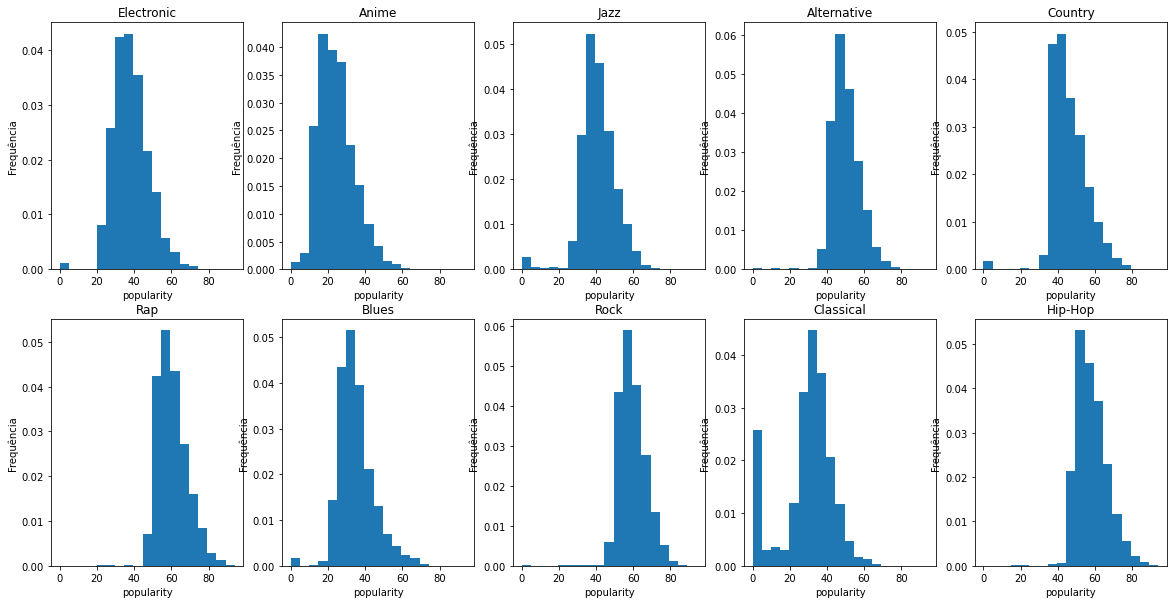

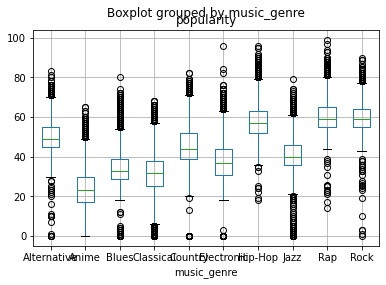

In [15]:
feature = 'popularity'
histogramas(feature);
df.boxplot(column=feature, by='music_genre');

### `acousticness` x `music_genre`

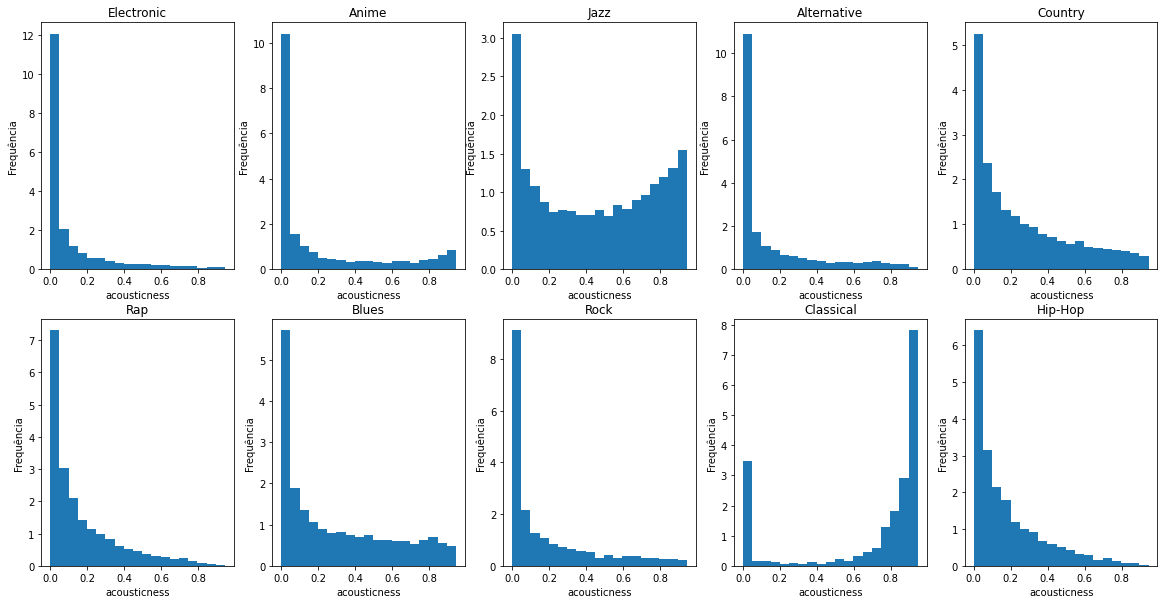

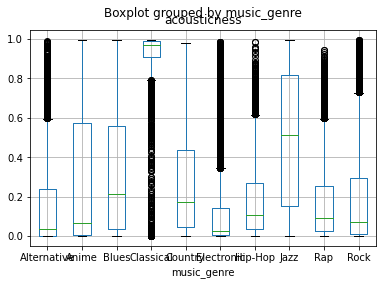

In [16]:
feature = 'acousticness'
histogramas(feature);
df.boxplot(column=feature, by='music_genre');

### `danceability` x `music_genre`

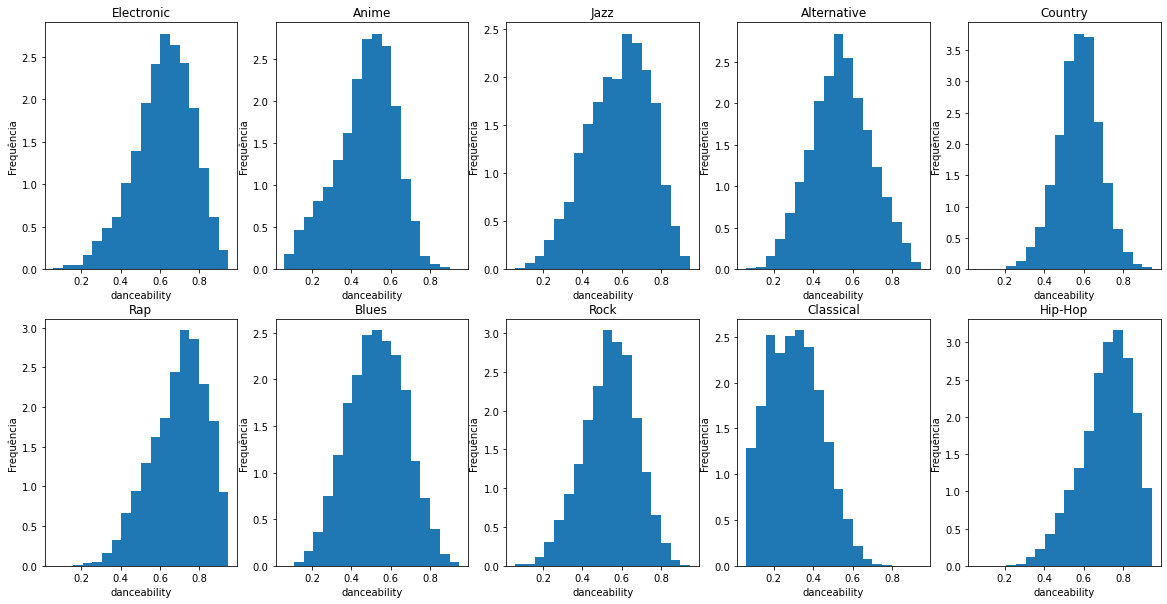

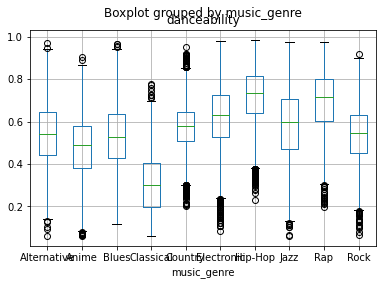

In [17]:
feature = 'danceability'
histogramas(feature);
df.boxplot(column=feature, by='music_genre');

### `duration(ms)` x `music_genre`

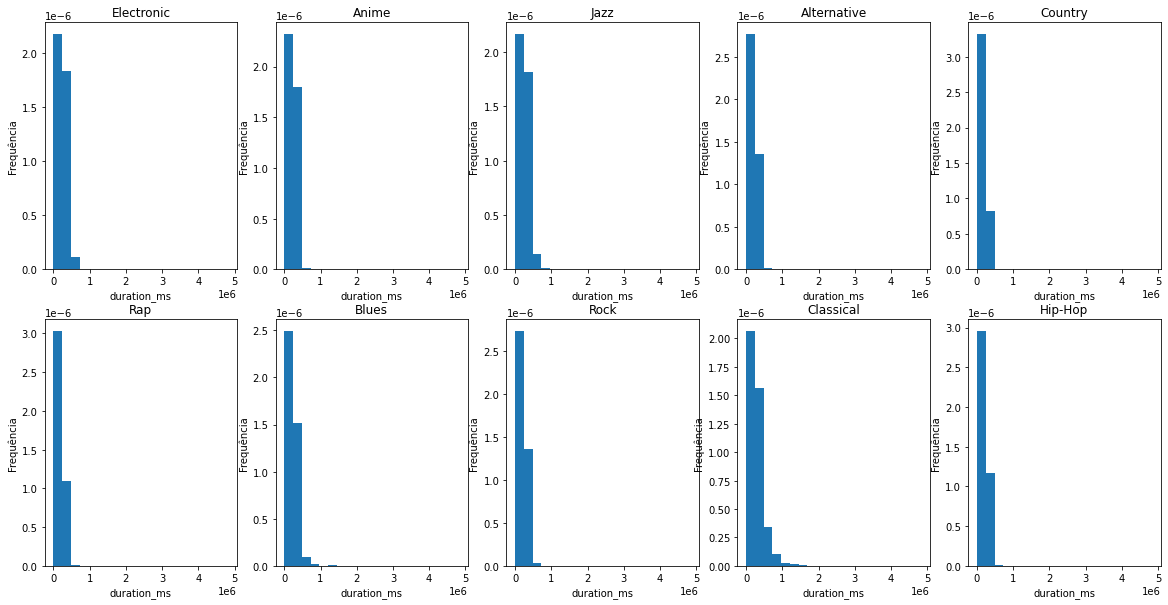

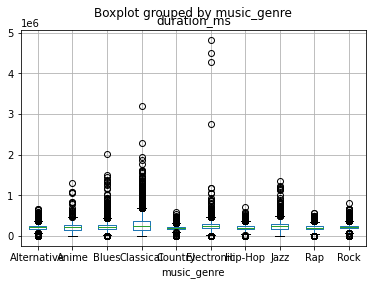

In [18]:
feature = 'duration_ms'
histogramas(feature);
df.boxplot(column=feature, by='music_genre');

### `energy` x `music_genre`

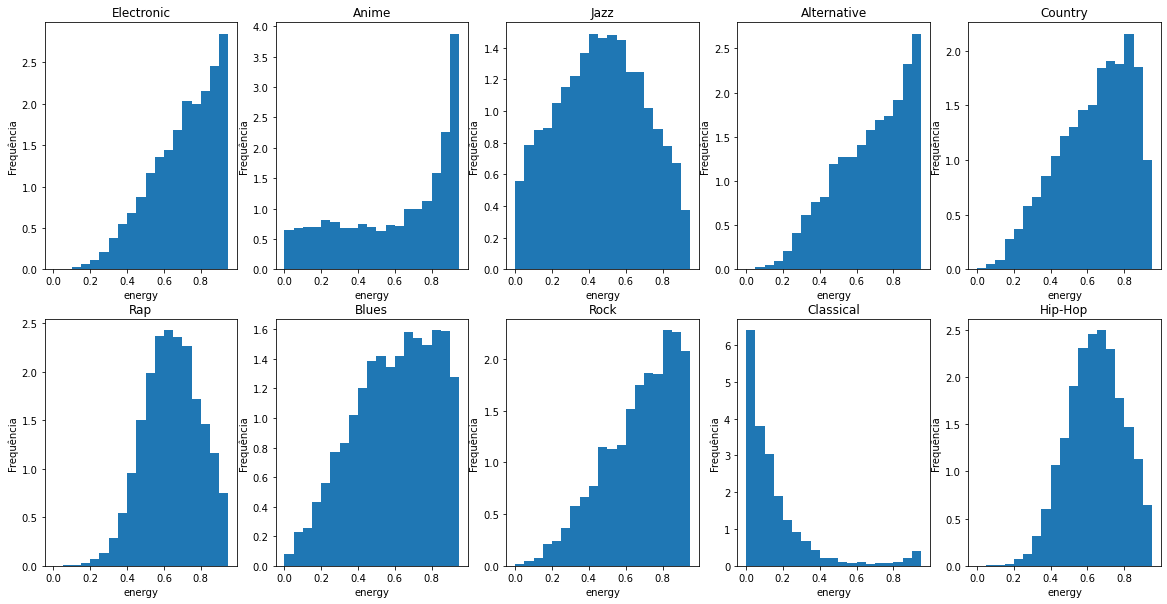

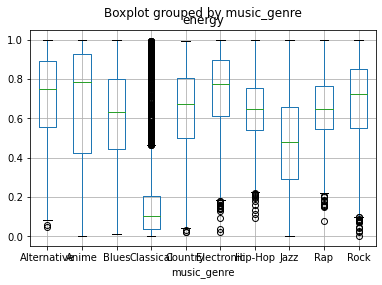

In [19]:
feature = 'energy'
histogramas(feature);
df.boxplot(column=feature, by='music_genre');

### `instrumentalness` x `music_genre`

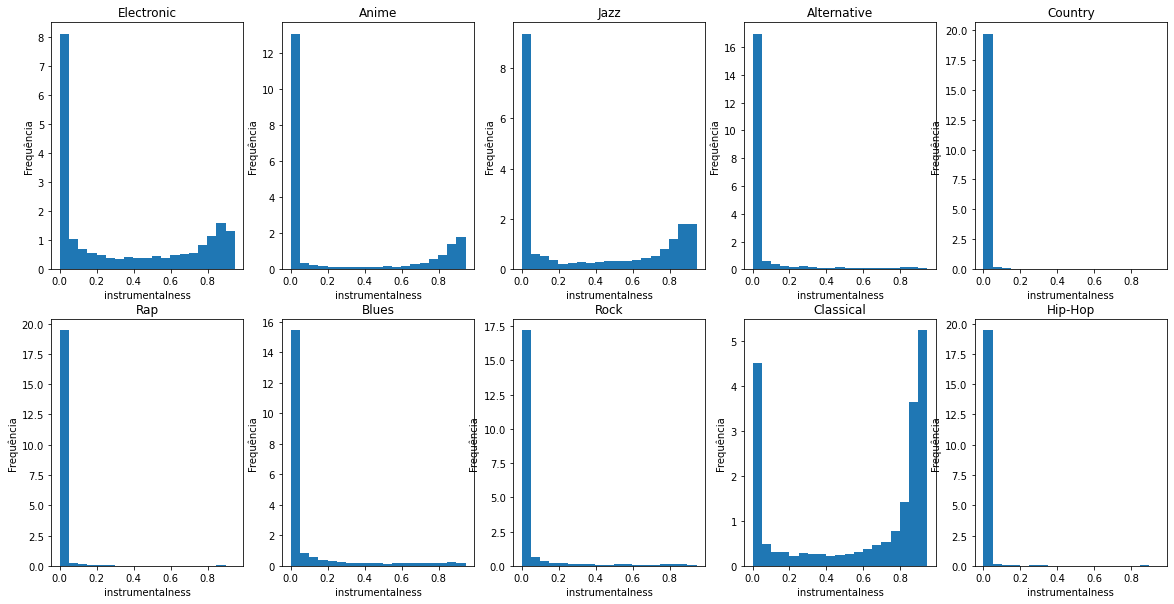

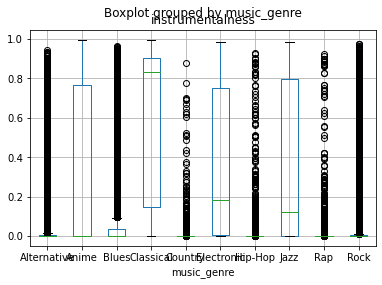

In [20]:
feature = 'instrumentalness'
histogramas(feature);
df.boxplot(column=feature, by='music_genre');

### `liveness` x `music_genre`

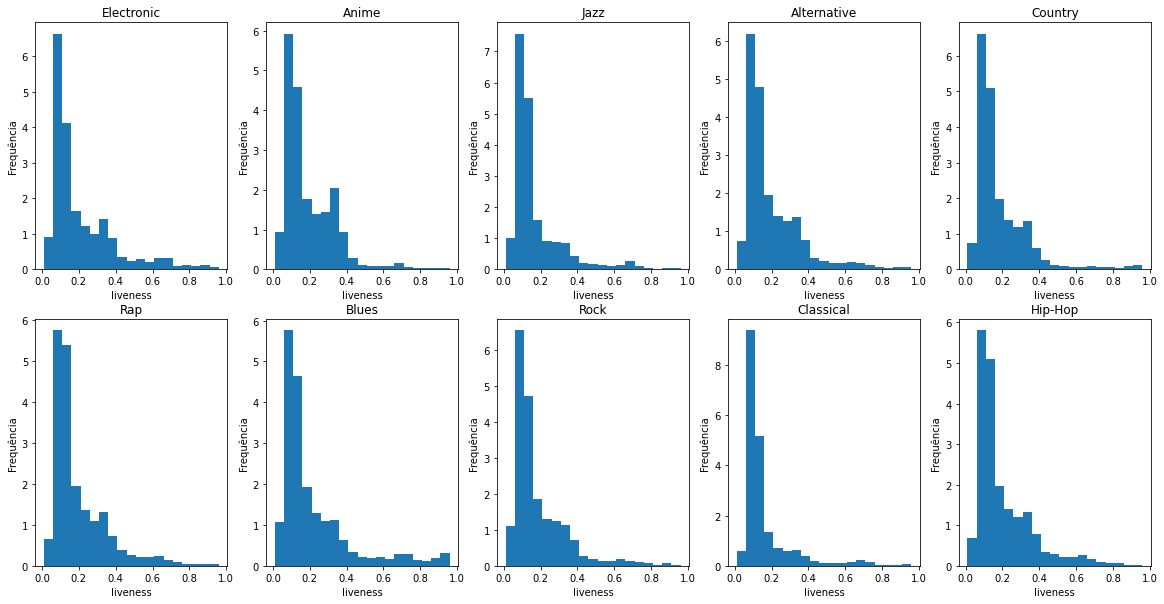

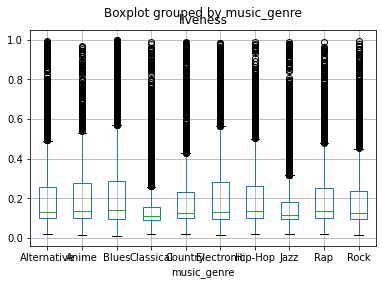

In [21]:
feature = 'liveness'
histogramas(feature);
df.boxplot(column=feature, by='music_genre');

### `loudness` x `music_genre`

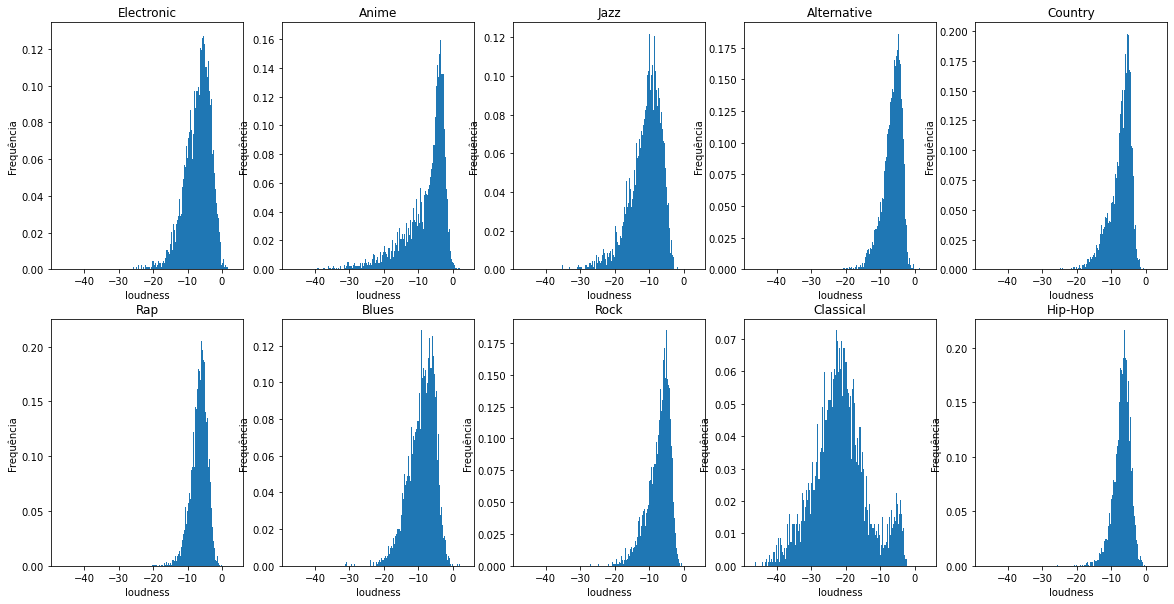

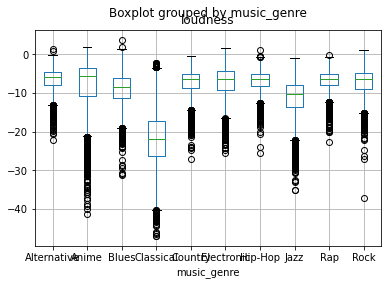

In [22]:
feature = 'loudness'
histogramas(feature);
df.boxplot(column=feature, by='music_genre');

### `speechiness` x `music_genre`

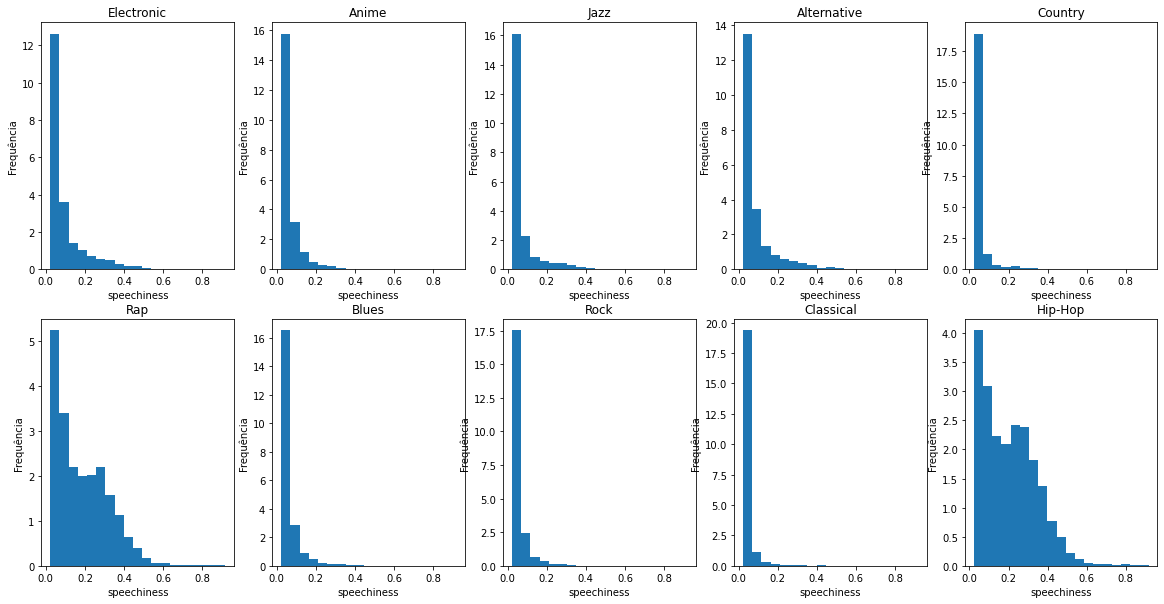

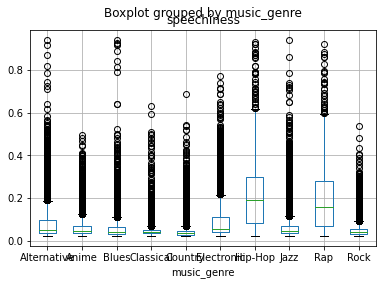

In [23]:
feature = 'speechiness'
histogramas(feature);
df.boxplot(column=feature, by='music_genre');

### `valence` x `music_genre`

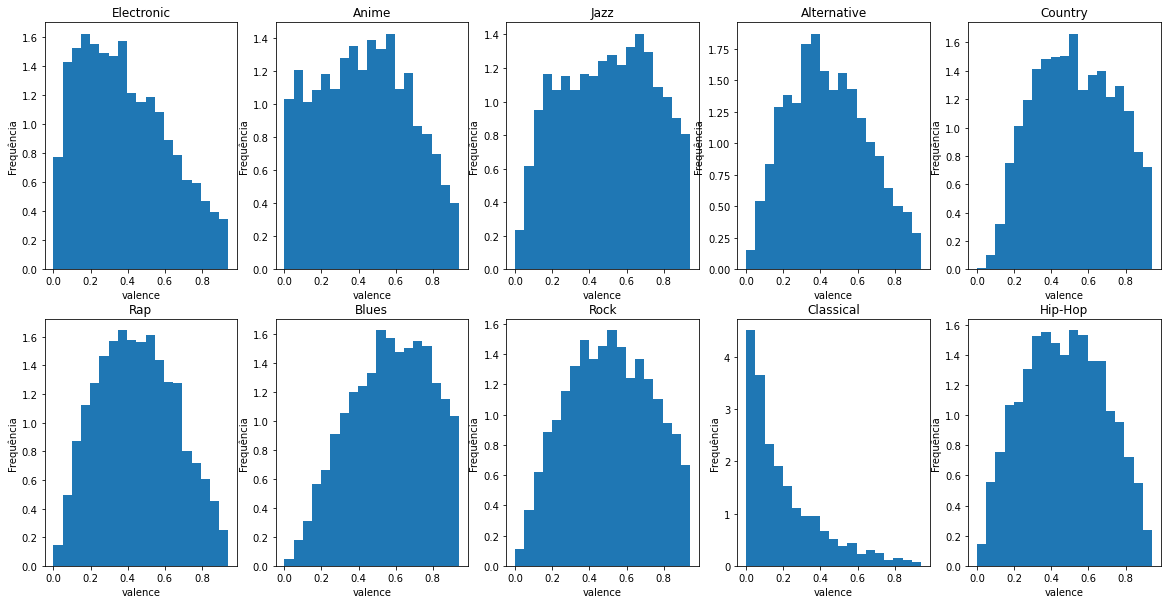

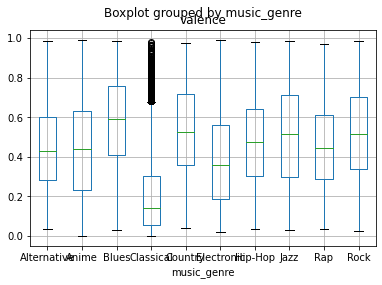

In [24]:
feature = 'valence'
histogramas(feature);
df.boxplot(column=feature, by='music_genre');

# Mapa de calor para observar as correlações das variáveis 

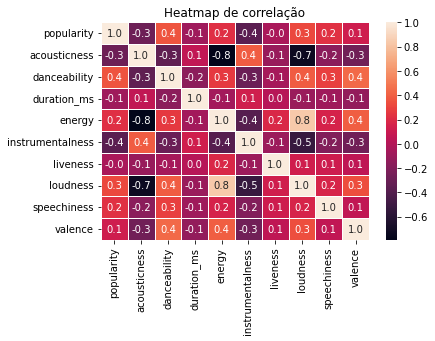

In [25]:
sn.heatmap(df.drop(columns=['instance_id']).corr(), annot=True, fmt=".1f", linewidths=.6)
plt.title('Heatmap de correlação')
plt.show()

# **Primeiro Modelo:** Random Forest Regression

In [51]:
df['tempo'].unique()

array([100.889, 115.002, 127.994, ..., 112.97 , 167.655,  99.201])

In [90]:
rfdf = pd.get_dummies(df)

label_columns = [f'music_genre_{label_type}' for label_type in df['music_genre'].unique()]

labels = np.array(rfdf[rfdf.columns.intersection(label_columns)])

features = rfdf.drop(columns=label_columns)
feature_list = list(features.columns)
features = np.array(features)

In [89]:
labels

,music_genre_Alternative,music_genre_Anime,music_genre_Blues,music_genre_Classical,music_genre_Country,music_genre_Electronic,music_genre_Hip-Hop,music_genre_Jazz,music_genre_Rap,music_genre_Rock
0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
50000,0,0,0,0,0,0,1,0,0,0
50001,0,0,0,0,0,0,1,0,0,0
50002,0,0,0,0,0,0,1,0,0,0
50003,0,0,0,0,0,0,1,0,0,0


In [91]:
from sklearn.model_selection import train_test_split

train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (33765, 25)
Training Labels Shape: (33765, 10)
Testing Features Shape: (11255, 25)
Testing Labels Shape: (11255, 10)


In [137]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 200, random_state = 42, n_jobs=-1)

rf.fit(train_features, train_labels)

RandomForestRegressor(n_estimators=200, n_jobs=-1, random_state=42)

In [134]:
pred = rf.predict(test_features)

predictions = pd.DataFrame(pred, columns=label_columns).idxmax(axis=1).to_frame()
real = pd.DataFrame(test_labels, columns=label_columns).idxmax(axis=1).to_frame()

In [135]:
predictions.head()

,0
0,music_genre_Blues
1,music_genre_Blues
2,music_genre_Classical
3,music_genre_Anime
4,music_genre_Country


In [136]:
new_df = pd.DataFrame()

new_df['predicted'] = predictions[0]
new_df['correto'] = real[0]
new_df['acertou'] = (new_df['predicted'] == new_df['correto']).astype(int)

new_df['acertou'].value_counts()

1    6184
0    5071
Name: acertou, dtype: int64